In [9]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

# NaiveBayes Classification

In [10]:
df = pd.read_csv("../data/spam.csv")

In [11]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.shape

(5572, 2)

In [13]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X = df['Message']
y = df['Category']

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [18]:
X_train

5281               And how you will do that, princess? :)
1300    Great to hear you are settling well. So what's...
5128    Wot about on wed nite I am 3 then but only til 9!
1808      Do have a nice day today. I love you so dearly.
856     Talk sexy!! Make new friends or fall in love i...
                              ...                        
1180                  To day class is there are no class.
3441                       What time you thinkin of goin?
1344    Crazy ar he's married. Ü like gd looking guys ...
4623                They finally came to fix the ceiling.
1289                             Happy new year to u too!
Name: Message, Length: 4457, dtype: object

### The fit_transform method in Python is commonly used with machine learning or data preprocessing libraries like scikit-learn. It performs two actions:

Fit: Learns the parameters from the data (e.g., building a vocabulary of unique words in the dataset in this case).

Transform: Applies the learned parameters to the data, converting it into a numerical representation.

CountVectorizer(): This is used for converting text data into a bag-of-words representation, where each unique word in the text is assigned a column, and the rows represent how often each word appears in a document.

v.fit_transform(X_train):

fit: It analyzes X_train (a list of text documents) and builds a vocabulary of all the unique words.

transform: Converts X_train into a sparse matrix where each row corresponds to a document, and each column corresponds to a word from the vocabulary. The values represent the count of the words in the respective document.


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_test_count = v.transform(X_test)

#### X_train = ["cat sat on the mat", "dog barked"]

 X_train_count = v.fit_transform(X_train)

 Vocabulary: {'cat': 0, 'sat': 1, 'on': 2, 'the': 3, 'mat': 4, 'dog': 5, 'barked': 6}

 X_test = ["cat barked loudly", "dog sat on the roof"]

 X_test_count = v.transform(X_test)

 The test data transformation would:

 Ignore "loudly" and "roof" because they are not in the vocabulary

 
[[1, 0, 0, 0, 0, 0, 1],  # "cat barked loudly"
 [0, 1, 1, 0, 0, 1, 0]]  # "dog sat on the roof"

In [22]:
X_train_count.toarray()[1]

array([0, 0, 0, ..., 0, 0, 0], shape=(7723,))

In [24]:
len(X_train_count.toarray()[1])

7723

##### MultinomialNB - Suitable for cases where features are the frequency of words in a text. Widely used in Text Classification.
#####  GaussianNB   - Suitable for cases where features have continuous values that are normally distributed.

In [25]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB
model = MultinomialNB()
model.fit(X_train_count,y_train)

MultinomialNB()

### Model Evaluation: Precision, Recall, F1 Score

In [28]:
from sklearn.metrics import classification_report
y_pred = model.predict(X_test_count)
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       972
        spam       0.96      0.90      0.93       143

    accuracy                           0.98      1115
   macro avg       0.97      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



### Model Training: Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test,y_pred)

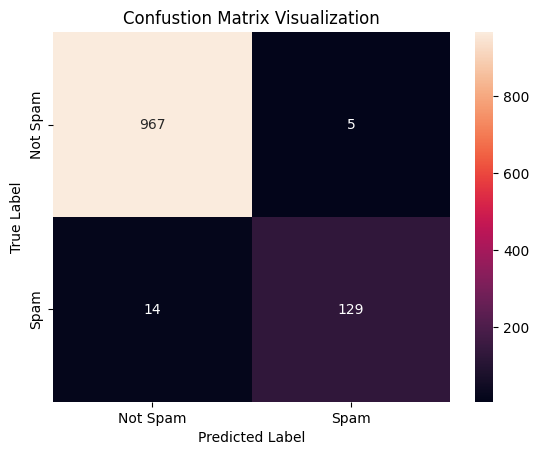

In [34]:
import matplotlib.pyplot as plt


sns.heatmap(cm,annot=True,fmt="d", xticklabels=['Not Spam','Spam'], yticklabels=['Not Spam','Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confustion Matrix Visualization')
plt.show()

#### Test samples , We are using text data. We will convert to matrix 

In [35]:
emails = [ "Good news, buy one get one Iphone" , "Get 50% discount on books purchase"]
emails_count = v.transform(emails)
model.predict(emails_count)

array(['ham', 'spam'], dtype='<U4')

In [36]:
model.predict_proba(emails_count)

array([[9.99445811e-01, 5.54189229e-04],
       [1.00204189e-02, 9.89979581e-01]])

### We will use Pipeline to implement Spam Classification